In [15]:
#import lib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load datasets
Train_Data = pd.read_csv("data_set_ALL_AML_train.csv")
Test_Data = pd.read_csv("data_set_ALL_AML_independent.csv")
Actual = pd.read_csv("actual.csv")

In [3]:
Train_Data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [4]:
Test_Data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [5]:
#checking for null values in dataset
print(Train_Data.isna().sum().max())
print(Test_Data.isna().sum().max())

0
0


In [6]:
#checking non-numerical features
#since there is no info about call features we can remove it from our dataset
data_object=Train_Data.select_dtypes(include=['object']) 
data_object.head()

,Gene Description,Gene Accession Number,call,call.1,call.2,call.3,call.4,call.5,call.6,call.7,...,call.28,call.29,call.30,call.31,call.32,call.33,call.34,call.35,call.36,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,A,A,A,A,A,A,A,A,...,A,A,A,P,A,A,A,P,A,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A


In [7]:
data_float_train = Train_Data.select_dtypes(include=['int64','int32','float64'])
data_float_test=Test_Data.select_dtypes(include=['int64','int32','float64'])
data_float_test.head()

,39,40,42,47,48,49,41,43,44,45,...,54,57,58,60,61,65,66,63,64,62
0,-342,-87,22,-243,-130,-256,-62,86,-146,-187,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,-200,-248,-153,-218,-177,-249,-23,-36,-74,-187,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,41,262,17,-163,-28,-410,-7,-141,170,312,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,328,295,276,182,266,24,142,252,174,142,...,319,178,340,31,396,141,95,146,431,9
4,-224,-226,-211,-289,-170,-535,-233,-201,-32,114,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


In [8]:
#appending the numerical features col.
column_names_test = list(data_float_test.columns.values)
column_names_train = list(data_float_train.columns.values)
patients=column_names_train+column_names_test

In [9]:
data=pd.concat([data_float_train,data_float_test],axis=1)[patients]
data.head()

,1,2,3,4,5,6,7,8,9,10,...,54,57,58,60,61,65,66,63,64,62
0,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,-58,-1,-307,265,-76,215,238,7,106,42,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,88,283,309,12,168,71,55,-2,268,219,...,319,178,340,31,396,141,95,146,431,9
4,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


In [10]:
# Transpose so that each row matches a patient
data = data.T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [11]:
# to join on
data["patient"] = pd.to_numeric(patients)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,patient
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,1
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,2
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,3
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,4
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,5


In [12]:
#AML is 1, MML is 0
Actual["cancer"]= pd.get_dummies(Actual.cancer, drop_first=True)

In [16]:
#add cancer column to train data
Data = pd.merge(data, Actual, on="patient")
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,0


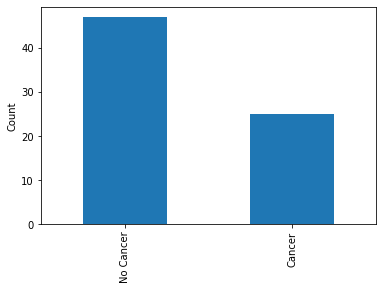

In [44]:
#Defining X and y
data_=Data
X = data_.drop('cancer', axis=1)
y = data_.cancer

# Visualize class distribution

y.value_counts().plot(kind='bar')
plt.xticks([0,1], ['No Cancer', 'Cancer'])
plt.ylabel('Count');

In [45]:
#Feature Scaling.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
pca = PCA(n_components=72)
pca.fit(X)
X_pca = pca.transform(X)

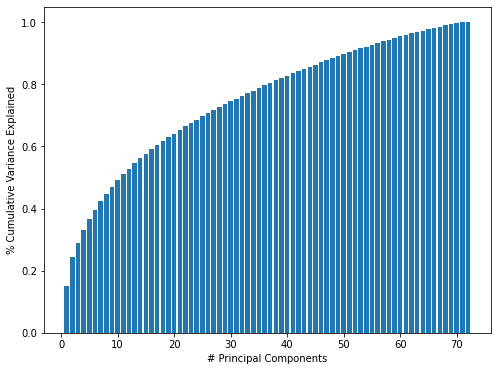

In [47]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,73), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

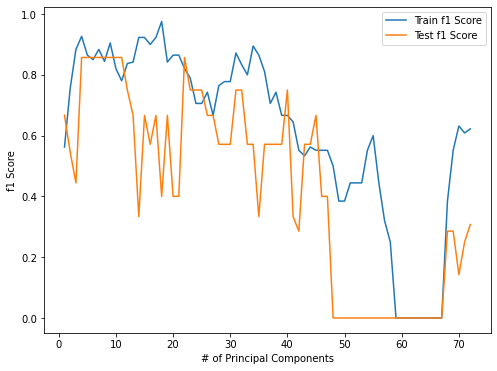

In [48]:
#Model 1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
train_f1 = []
test_f1 = []

for i in range(72):
    
    X = X_pca[:,0:i+1]
    
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        random_state=42)

    # Perform feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit k-NN classifier and make predictions
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))

# Plot accuracy by n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(range(1,73), train_f1, label='Train f1 Score')
plt.plot(range(1,73), test_f1, label='Test f1 Score')
plt.ylabel('f1 Score')
plt.xlabel('# of Principal Components')
plt.legend()
plt.show()

In [49]:
X = X_pca[:,0:4]
    
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit k-NN classifier and make predictions
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
    
print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))

Train f1 Score: 0.9268292682926829
Test f1 Score: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.75      0.86         4

    accuracy                           0.94        18
   macro avg       0.97      0.88      0.91        18
weighted avg       0.95      0.94      0.94        18



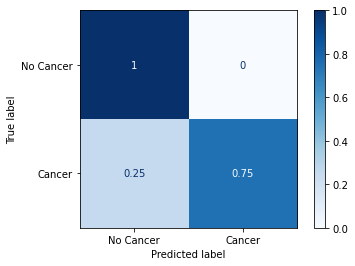

In [50]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=['No Cancer',
                                                          'Cancer'],
                     normalize='true', cmap='Blues');

&lt;matplotlib.collections.PathCollection at 0x2c6726d5648&gt;

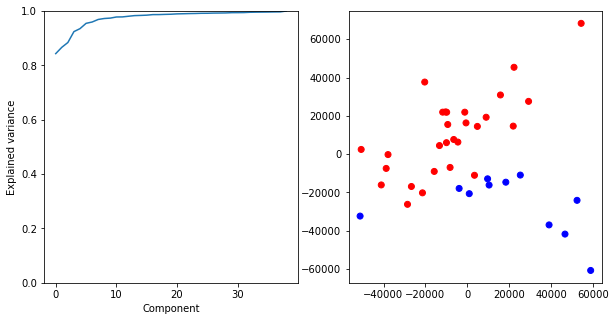

In [36]:
#Model 2
#SVC MODEL
#split data into train and test
#first 38 are for training set and rest for testset
Train_Data, Test_Data = Data.iloc[:39,:], Data.iloc[39:,:]
# perform pca on the Data to reduce the amount of features
X, y = Train_Data.drop(columns=["cancer"]), Train_Data["cancer"]
pca = PCA()
X_transformed = pca.fit_transform(X)

fig, axes = plt.subplots(1,2, figsize=(10,5))

f = np.vectorize(lambda x: 1 - x)
axes[0].plot(f(pca.explained_variance_ratio_))
axes[0].set_ylim(0,1)
axes[0].set_ylabel("Explained variance")
axes[0].set_xlabel("Component")

# for coloring the MML and AML class
f = np.vectorize(lambda x: "Blue" if x==1 else "Red")
axes[1].scatter(X_transformed[:,0], X_transformed[:,1], c=f(y)) 

In [37]:
# use fist ~20 components to make svc
components_to_use = 20

pca = PCA(n_components=components_to_use)
X_transformed = pca.fit_transform(X)

# do a grid search
grid = { "C": [i/10 for i in range(1, 50, 5)],
               "kernel": ["linear", "rbf", "poly"],
                "gamma":["auto"],
               "decision_function_shape" : ["ovo", "ovr"],
              }
            
seach = GridSearchCV(SVC(), grid, cv=3)
seach.fit(X_transformed, y)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={&#39;C&#39;: [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1,
                               4.6],
                         &#39;decision_function_shape&#39;: [&#39;ovo&#39;, &#39;ovr&#39;],
                         &#39;gamma&#39;: [&#39;auto&#39;],
                         &#39;kernel&#39;: [&#39;linear&#39;, &#39;rbf&#39;, &#39;poly&#39;]})

In [38]:
# select best svc
best_svc = seach.best_estimator_

for parameter, value in best_svc.get_params().items():
    print(parameter, value, sep='\t')
    
print("\nscore on train: {0}".format(best_svc.score(X_transformed, y)))

C	0.1
break_ties	False
cache_size	200
class_weight	None
coef0	0.0
decision_function_shape	ovo
degree	3
gamma	auto
kernel	linear
max_iter	-1
probability	False
random_state	None
shrinking	True
tol	0.001
verbose	False

score on train: 1.0


In [39]:
# test best svc on test
X_test, y_test = Test_Data.drop(columns=["cancer"]), Test_Data["cancer"]


X_test_transformed = pca.transform(X_test)

print("accuracy on test set {0}".format(best_svc.score(X_test_transformed, y_test)))

accuracy on test set 0.9393939393939394


In [40]:
#Model 3
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 

	# Creating the classifier object 
	clf_gini = DecisionTreeClassifier(criterion = "gini", 
			random_state = 100,max_depth=3, min_samples_leaf=5) 

	# Performing training 
	clf_gini.fit(X_train, y_train) 
	return clf_gini 
	
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 

	# Decision tree with entropy 
	clf_entropy = DecisionTreeClassifier( 
			criterion = "entropy", random_state = 100, 
			max_depth = 3, min_samples_leaf = 5) 

	# Performing training 
	clf_entropy.fit(X_train, y_train) 
	return clf_entropy 


# Function to make predictions 
def prediction(X_test, clf_object): 

	# Predicton on test with giniIndex 
	y_pred = clf_object.predict(X_test) 
	print("Predicted values:") 
	print(y_pred) 
	return y_pred 
	
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
	
	print("Confusion Matrix: ", 
		confusion_matrix(y_test, y_pred)) 
	
	print ("Accuracy : ", 
	accuracy_score(y_test,y_pred)*100) 
	
	print("Report : ", 
	classification_report(y_test, y_pred)) 

# Driver code 
def main(): 
	
	# Building Phase 
	X_train, y_train,X_test, y_test= Train_Data.drop(columns=["cancer"]), Train_Data["cancer"],Test_Data.drop(columns=["cancer"]), Test_Data["cancer"]
	clf_gini = train_using_gini(X_train, X_test, y_train) 
	clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
	
	# Operational Phase 
	print("Results Using Gini Index:") 
	
	# Prediction using gini 
	y_pred_gini = prediction(X_test, clf_gini) 
	cal_accuracy(y_test, y_pred_gini) 
    
	
	print("Results Using Entropy:") 
	# Prediction using entropy 
	y_pred_entropy = prediction(X_test, clf_entropy) 
	cal_accuracy(y_test, y_pred_entropy) 
	
	
# Calling main function 
if __name__=="__main__": 
	main() 


Results Using Gini Index:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
Confusion Matrix:  [[17  2]
 [ 1 13]]
Accuracy :  90.9090909090909
Report :                precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.87      0.93      0.90        14

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33

Results Using Entropy:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
Confusion Matrix:  [[17  2]
 [ 1 13]]
Accuracy :  90.9090909090909
Report :                precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.87      0.93      0.90        14

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91   


ACCURACY OF THE MODEL:  0.7575757575757576


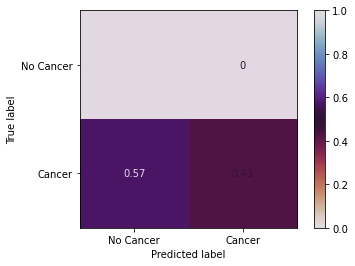

In [53]:
#Model 4
X_train, y_train,X_test, y_test= Train_Data.drop(columns=["cancer"]), Train_Data["cancer"],Test_Data.drop(columns=["cancer"]), Test_Data["cancer"]
# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(X_train, y_train) 
  
# performing predictions on the test dataset 
y_pred = clf.predict(X_test) 
  
# metrics are used to find accuracy or error 
from sklearn import metrics   
print() 
  
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))  
plot_confusion_matrix(clf, X_test, y_test, display_labels=['No Cancer',
                                                          'Cancer'],normalize='true', cmap='twilight_r');